In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

In [3]:
df = pd.io.sql.read_sql("""SELECT uid, numTrials, timestamp
                        FROM checker
                        WHERE uid like 'user_%' and status = 'ready' and labname = 'project1'
                        ORDER BY uid""", con, parse_dates=['timestamp'])

In [4]:
df.head()

,uid,numTrials,timestamp
0,user_1,1,2020-05-14 20:56:08.898880
1,user_1,2,2020-05-14 20:58:02.313690
2,user_1,3,2020-05-14 20:58:46.322457
3,user_1,4,2020-05-14 21:08:15.434237
4,user_1,5,2020-05-14 21:10:14.867603


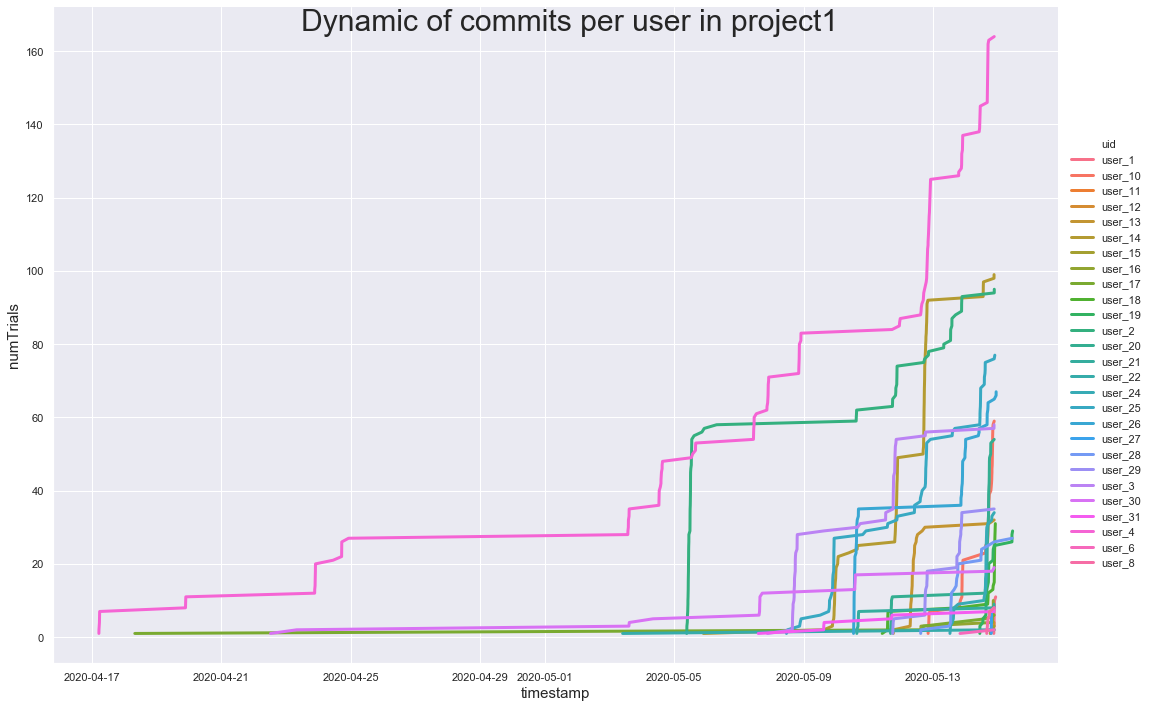

In [5]:
sns.set(palette="cool", rc={'axes.labelsize': 15, 'lines.linewidth': 3})
sns.relplot(data=df, x="timestamp", y="numTrials", hue="uid",  kind="line", height=10, aspect=1.5)
plt.suptitle('Dynamic of commits per user in project1', fontsize=30)
plt.show()

## Which user was almost all of the time the leader in the number of commits?

user_4

## Which user was the leader for only a short period of time?

user_2